In [6]:
import requests
from bs4 import BeautifulSoup

response = requests.get('https://www.weather.go.kr/w/obs-climate/land/city-obs.do')
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', id = 'weather_table')

data = []

for tr in table.find_all('tr'):
  tds = list(tr.find_all('td'))

  for td in tds:
    if td.find('a'):
      point = td.find('a').text
      temperature = tds[5].text
      humidity = tds[10].text

      data.append([point, temperature, humidity])

data

[['강릉', '3.7', '39'],
 ['강진군', '4.4', '68'],
 ['강화', '-1.7', '70'],
 ['거제', '3.2', '77'],
 ['거창', '0.3', '68'],
 ['경주시', '3.6', '43'],
 ['고산', '6.2', '82'],
 ['고창', '1.5', '87'],
 ['고창군', '1.7', '77'],
 ['고흥', '5.7', '62'],
 ['광양시', '5.2', '56'],
 ['광주', '1.8', '94'],
 ['구미', '-0.4', '62'],
 ['군산', '0.2', '83'],
 ['금산', '-0.5', '82'],
 ['김해시', '3.4', '53'],
 ['남원', '0.2', '80'],
 ['남해', '2.8', '65'],
 ['대관령', '-4.9', '68'],
 ['대구', '2.8', '49'],
 ['대전', '0.7', '71'],
 ['동두천', '-1.2', '64'],
 ['동해', '3.8', '37'],
 ['목포', '1.2', '92'],
 ['문경', '-1.0', '72'],
 ['밀양', '3.4', '41'],
 ['백령도', '-1.0', '83'],
 ['보령', '-0.1', '89'],
 ['보성군', '4.0', '65'],
 ['보은', '-0.2', '77'],
 ['봉화', '-0.2', '62'],
 ['부산', '3.5', '57'],
 ['부안', '1.4', '84'],
 ['부여', '-1.7', '91'],
 ['북강릉', '3.4', '37'],
 ['북부산', '3.7', '47'],
 ['북창원', '4.4', '50'],
 ['북춘천', '-4.3', '57'],
 ['산청', '2.0', '71'],
 ['상주', '-0.4', '76'],
 ['서귀포', '9.9', '49'],
 ['서산', '2.6', '64'],
 ['서울', '-1.0', '71'],
 ['서청주', '-1.4', '76'],
 [

In [12]:
with open('weather.csv', 'w', encoding='utf-8') as file:
  file.write('point,temperature,humidity\n')

  for i in data:
    file.write(f'{i[0]}, {i[1]}, {i[2]}\n')

In [15]:
import pandas as pd

df = pd.read_csv('weather.csv', index_col = 'point')

df

,temperature,humidity
point,,
강릉,3.7,39
강진군,4.4,68
강화,-1.7,70
거제,3.2,77
거창,0.3,68
...,...,...
합천,4.3,50
해남,2.5,79
홍성,-0.5,78


In [17]:
city_df = df.loc[['부산', '서울', '대전', '울산', '대구']]
city_df

,temperature,humidity
point,,
부산,3.5,57
서울,-1.0,71
대전,0.7,71
울산,4.1,44
대구,2.8,49


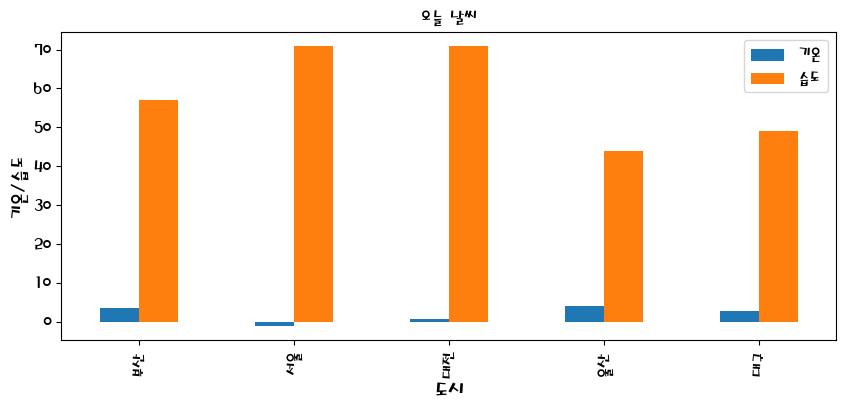

In [32]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt

font_path = r'C:\Windows\Fonts\HMKMMAG.TTF'

font_name = font_manager.FontProperties(fname = font_path).get_name()

matplotlib.rc('font', family = font_name)

ax = city_df.plot(kind = 'bar', title = '오늘 날씨', figsize = (10, 4), legend = True, fontsize = 12)
ax.set_xlabel('도시', fontsize = 16)
ax.set_ylabel('기온/습도', fontsize = 14)
ax.legend(['기온', '습도'], fontsize = 12)